## Simple Linear Regression With scikit-learn

In [1]:
"""Step of the process

    1) Import the packages and classes that you need.
    2) Provide data to work with, and eventually do appropriate transformations.
    3) Create a regression model and fit it with existing data.
    4) Check the results of model fitting to know whether the model is satisfactory.
    5) Apply the model for predictions.

""" 

#Step 1: Import packages and classes

import numpy as np
from sklearn.linear_model import LinearRegression



In [2]:
#Step 2: Provide data
# The inputs (regressors, 𝑥) and output (response, 𝑦) 

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])


In [3]:
# Step 3: Create a model and fit it

model = LinearRegression()


In [4]:
#start using the model by first calling .fit() on model:

model.fit(x, y)
LinearRegression()

LinearRegression()

In [7]:
# Replace the statement with the following as the previous returns self

model = LinearRegression().fit(x, y)

In [8]:
#Step 4: Get results
#Obtain the coefficient of determination, 𝑅², with .score() called on model:

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7158756137479542


In [9]:
#Let us get the attributes of model which are .intercept_, that represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁:

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

intercept: 5.633333333333329
slope: [0.54]


In [ ]:
## The value of 𝑏₀ is approximately 5.63. 
## This illustrates that your model predicts the response 5.63 when 𝑥 is zero. 
## The value 𝑏₁ = 0.54 means that the predicted response rises by 0.54 when 𝑥 is increased by one.

In [10]:
# Let us provide y as a two-dimensional array as well. 
# In this case, you’ll get a similar result. This is how it might look:

new_model = LinearRegression().fit(x, y.reshape((-1, 1))) 

print(f"intercept: {new_model.intercept_}")
print(f"slope: {new_model.coef_}")

intercept: [5.63333333]
slope: [[0.54]]


In [11]:
#Step 5: Predict response
# Once you have a satisfactory model, 
# then you can use it for predictions with either existing or new data. 
# To obtain the predicted response, use .predict():

y_pred = model.predict(x) 
print(f"predicted response:\n{y_pred}")

predicted response:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


In [12]:
#We can add a little twist to it
#By applying .predict(), you pass the regressor as the argument and get the corresponding predicted response. 
# This is a nearly identical way to predict the response:

y_pred = model.intercept_ + model.coef_ * x  # In this case, you multiply each element of x with model.coef_ and add model.intercept_ to the product.

print(f"predicted response:\n{y_pred}") #The output here differs from the previous example only in dimensions.

predicted response:
[[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


## Multiple Linear Regression With scikit-learn

In [13]:
# Steps 1 and 2: Import packages and classes, and provide data
# Again, first, you import numpy and sklearn.linear_model.LinearRegression and provide known inputs and output:

import numpy as np
from sklearn.linear_model import LinearRegression

x = [
[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]
]

y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [14]:
#Step 3: Create a model and fit it
#The next step is to create the regression model as an instance of LinearRegression and fit it with .fit():

model = LinearRegression().fit(x, y)

In [15]:
#Step 4: Get results
# You can obtain the properties of the model the same way as in the case of simple linear regression:

r_sq = model.score(x, y) # You obtain the value of 𝑅² using .score()
print(f"coefficient of determination: {r_sq}") 

print(f"intercept: {model.intercept_}") #Estimate of the regression coefficients with .intercept_ (𝑏₀)
print(f"coefficients: {model.coef_}") #Estimate of the regression coefficients with .coef_ (𝑏₁ and 𝑏₂.)

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
coefficients: [0.44706965 0.25502548]


In [16]:
# Step 5: Predict response
#Predictions also work the same way as in the case of simple linear regression:

y_pred = model.predict(x) 
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [17]:
# Similarly thesame predicted response is obtained with .predict(), which is equivalent to the following:

y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1) 
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [18]:
#You can predict the output values by multiplying each column of the input with the appropriate weight, 
#summing the results, and adding the intercept to the sum.
# First step, you can apply this model to new data as well:

x_new = np.arange(10).reshape((-1, 2)) 
x_new 


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [19]:
#You can predict the output values by multiplying each column of the input with the appropriate weight, 
#summing the results, and adding the intercept to the sum.
# Second step, you predict the ouput values using the new data:
y_new = model.predict(x_new) 
y_new


array([ 5.77760476,  7.18179502,  8.58598528,  9.99017554, 11.3943658 ])

## That’s the prediction using a linear regression model.

## Now to plot that Model

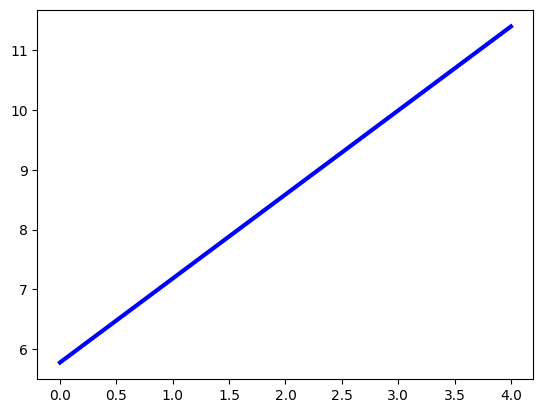

In [23]:
import matplotlib.pyplot as plt 

# Plot outputs

plt.plot(y_new, color="blue", linewidth=3) 



## Read Dataset Example
## Code source: Jaques Grobler

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [26]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2] 

In [27]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:] 

In [28]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:] 

In [29]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [30]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [31]:
# Replace the statement with the following as the previous returns self

model = LinearRegression().fit(diabetes_X_train, diabetes_y_train)

In [32]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [33]:
# The coefficients
print("Coefficients: \n", regr.coef_) 

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred)) 

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


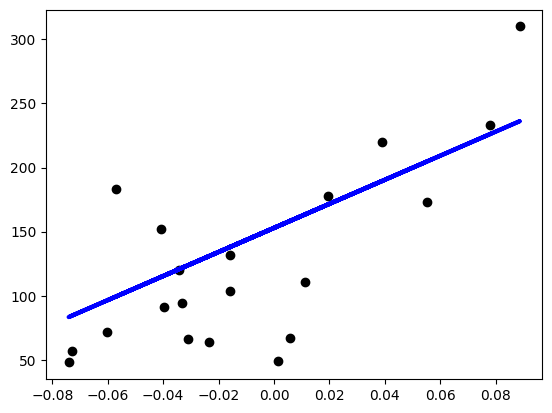

In [35]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)


plt.show()